<a href="https://colab.research.google.com/github/therohanrao/FourierAdderly/blob/main/FourierAdderly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at drive


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


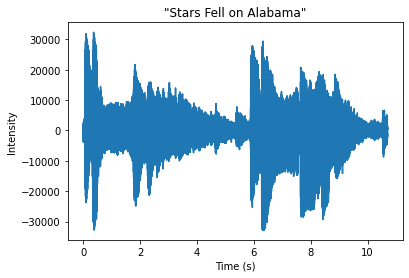


This is a Fourier Transform analysis of the song "Stars Fell on Alabama" 
played by Cannonball Adderly

The audio used can be found here: https://youtu.be/ddcWxY-K9vk?t=11
(from 00:11-00:21)

1.) The sound file in this form (the FFT plot) isn't easily identifiable as this song,
but when paired with the spectrogram, it's easy to see where the peak frequencies 
are played in the song

2.) You can easily identify the notes at different times. For example, the first note
is ~200 Hz and can be seen on both the FFT plot and the spectrogram at an intensity
of ~.6

the 400 Hz note at around 4s can also be clearly seen on both graphs

This probably worked well because I mostly edited out most of the accompaniment
and amplified the saxophone to make the notes more defined





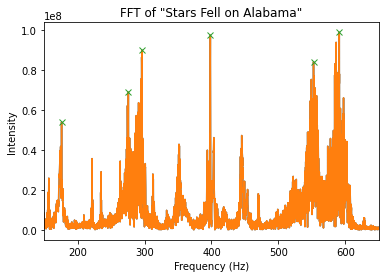

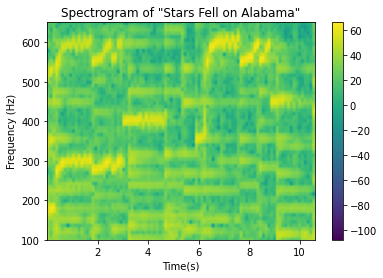

In [ ]:
from google.colab import drive
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

drive.mount('drive', force_remount=True)

rate, data = wavfile.read('/content/drive/My Drive/Colab Notebooks/StarsFell.wav')

number_of_values = len(data)
time_per_sample = 1. / rate 
time_arr = np.arange(number_of_values) * time_per_sample
plt.plot(time_arr, data)
plt.title('"Stars Fell on Alabama"')
plt.xlabel("Time (s)")
plt.ylabel("Intensity")
plt.show()


print('''
This is a Fourier Transform analysis of the song "Stars Fell on Alabama" 
played by Cannonball Adderly

The audio used can be found here: https://youtu.be/ddcWxY-K9vk?t=11
(from 00:11-00:21)

1.) The sound file in this form (the FFT plot) isn't easily identifiable as this song,
but when paired with the spectrogram, it's easy to see where the peak frequencies 
are played in the song

2.) You can easily identify the notes at different times. For example, the first note
is ~200 Hz and can be seen on both the FFT plot and the spectrogram at an intensity
of ~.6

the 400 Hz note at around 4s can also be clearly seen on both graphs

This probably worked well because I mostly edited out most of the accompaniment
and amplified the saxophone to make the notes more defined


''')


frequencies = np.arange(number_of_values) * rate / number_of_values # Hz
time_arr = np.arange(number_of_values) * time_per_sample
fourier_transform = np.fft.fft(data)
plt.plot(frequencies,np.abs(fourier_transform))
plt.xlim([0,1000])

from scipy.signal import find_peaks

peaks, _ = find_peaks(np.abs(fourier_transform), height= 50700000, distance = 15* number_of_values/rate)
#height will set the minimum intensity for a peak
#distance will set the minimum separation between peaks
peaks = peaks[peaks > 150 * number_of_values/rate] #Makes the minimum frequency for a peak be 200 Hz
plt.plot(frequencies, np.abs(fourier_transform))
plt.plot(frequencies[peaks], np.abs(fourier_transform)[peaks], "x")
plt.xlim([150, 650])
plt.title('FFT of "Stars Fell on Alabama"')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Intensity")
plt.show()


spectrum, freqs, t, im = plt.specgram(data, Fs = rate, NFFT = 5000)
plt.colorbar()
plt.ylim([100,650])
plt.title('Spectrogram of "Stars Fell on Alabama"')
plt.xlabel('Time(s)')
plt.ylabel('Frequency (Hz)')
plt.show()
